In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
import matplotlib.pyplot as graphs
from sklearn.ensemble import RandomForestClassifier
from copy import deepcopy
import math
from IPython.display import Image

import matplotlib.pyplot as graphs
from matplotlib.colors import ListedColormap

In [2]:
def readXY(file):
    trainTemp = pd.read_csv("data/" + file + ".csv")
    trainX = trainTemp[trainTemp.columns[:-1]].loc[:].values
    trainYt = trainTemp[trainTemp.columns[-1]].loc[:].values
    trainY = np.vectorize(lambda t: 1 if t == 'P' else -1)(trainYt)
    return trainX, trainY

In [3]:
# train our classifier, return needed things for predictMy
def fitMy(curFile, countClfNeed = 50):
    x, y = readXY(curFile)
    n = x.shape[0]
    baseClf = DecisionTreeClassifier(max_depth = 2)
    countClf = countClfNeed
    clfs = []
    for i in range(countClf):
        clfs.append(deepcopy(baseClf))
    w = []
    # 1 - 2
    for i in range(n):
        w.append(1 / n)
    w = np.array(w)
    bettas = []
    # 3 
    for t in clfs:
        t.fit(x, y, sample_weight = w)
        yPredicted = t.predict(x)
        # 5 - normalize = False make it function returns
        # count of wrong classification elements - on which y * yPredicted < 0 (as we have binary +-1, < 0 means wrong)
        Nt = zero_one_loss(y, yPredicted, normalize=False, sample_weight = w)
        # 6
        bt = 0.5 * math.log((1 - Nt) / Nt)
        bettas.append(bt)
        # 7 - 8
        w = w * np.exp(-bt * (y * yPredicted))
        # 9
        w /= np.sum(w)
    return (bettas, clfs)

In [4]:
def predictMy(bettas, clfs, x):
    ans = np.zeros(x.shape[0])
    index = 0
    for t in clfs:
        curB = bettas[index]
        ans += curB * t.predict(x)
        index += 1
    return np.sign(ans)

In [5]:
def draw(bettas, clfs, X, y, step, filename, numbStep):
    stepx = step
    stepy = 0.01
    x_min, y_min = np.amin(X, 0)
    x_max, y_max = np.amax(X, 0)
    x_min -= stepx
    x_max += stepx
    y_min -= stepy
    y_max += stepy
    xx, yy = np.meshgrid(np.arange(x_min, x_max, stepx),
                         np.arange(y_min, y_max, stepy))
    
    mesh_dots = np.c_[xx.ravel(), yy.ravel()]
    zz = predictMy(bettas, clfs, mesh_dots)
    zz = np.array(zz).reshape(xx.shape)
    
    graphs.figure(figsize=(10, 10))
    graphs.xlim(x_min, x_max)
    graphs.ylim(y_min, y_max)
    x0, y0 = X[y == -1].T
    x1, y1 = X[y == 1].T
    
    graphs.pcolormesh(xx, yy, zz, cmap=ListedColormap(['#54ff9f', '#ffbd88']))
    graphs.scatter(x0, y0, color='#4cbb17', s=100)
    graphs.scatter(x1, y1, color='#b85d43', s=100)
    graphs.savefig(filename + "/" + str(numbStep) + ".png")
    #graphs.show()
    graphs.close()

In [6]:
#clf1 = fitMy("chips")
#x1, y1 = readXY("chips")
#draw(clf1[0], clf1[1], x1, y1, 0.01)

In [7]:
#clf2 = fitMy("geyser")
#x2, y2 = readXY("geyser")
#draw(clf2[0], clf2[1], x2, y2, 0.01)

# CHIPS

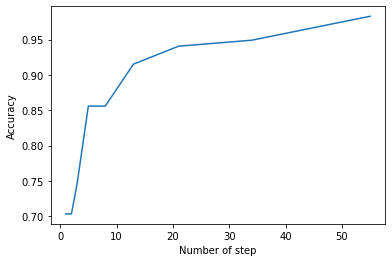

In [14]:
accs = []
counts = [1, 2, 3, 5, 8, 13, 21, 34, 55]
for count in counts:
    clf1 = fitMy("chips", count)
    x1, y1 = readXY("chips")
    acc = accuracy_score(y1, predictMy(clf1[0], clf1[1], x1))
    draw(clf1[0], clf1[1], x1, y1, 0.01, "chipsFolder", count)
    accs.append(acc)
graphs.plot(counts, accs)
graphs.xlabel('Number of step')
graphs.ylabel('Accuracy')
graphs.show()

# GEYSER

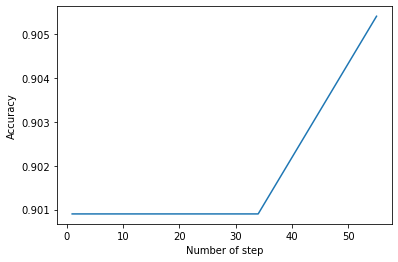

In [15]:
accs = []
counts = [1, 2, 3, 5, 8, 13, 21, 34, 55]
for count in counts:
    clf1 = fitMy("geyser", count)
    x1, y1 = readXY("geyser")
    acc = accuracy_score(y1, predictMy(clf1[0], clf1[1], x1))
    draw(clf1[0], clf1[1], x1, y1, 0.01, "geyserFolder", count)
    accs.append(acc)
graphs.plot(counts, accs)
graphs.xlabel('Number of step')
graphs.ylabel('Accuracy')
graphs.show()

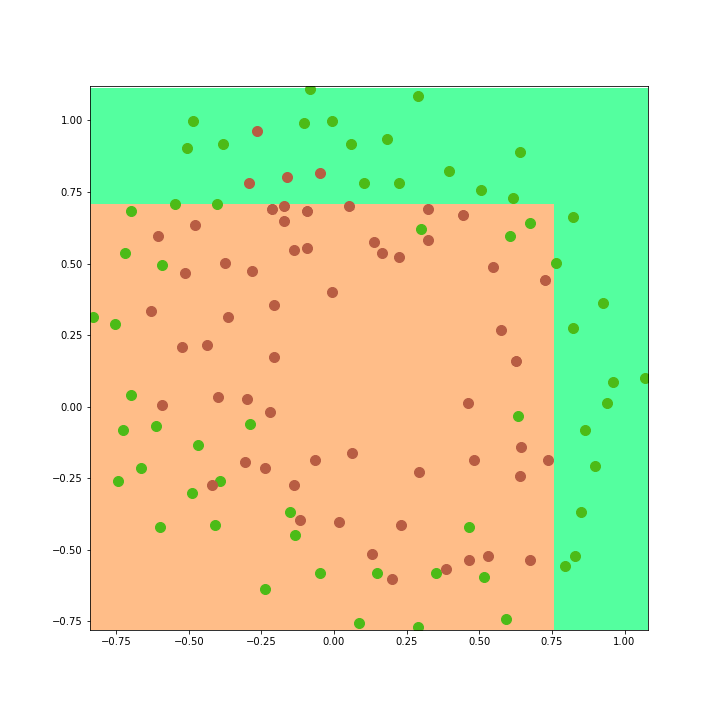

In [10]:
Image(filename="chipsFolder/chipsGIF.gif.png")

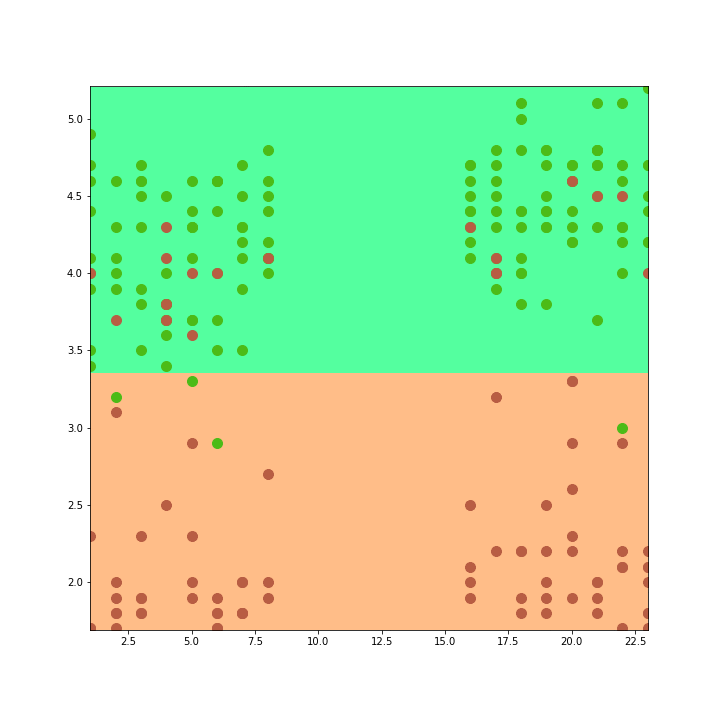

In [11]:
Image(filename="geyserFolder/geyserGIF.gif.png")